# K-Means Clustering

### Overview
To cluster the data on basis of the sales each customer brings


#### Steps followed to do Clustering:
 1. Read and Visualise the data
 2. Clean the data
 3. Prepare the data for modelling
 4. Modelling
 5. Final analysis and reco

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1 : Import Dataset and visualize data

In [89]:
retail_df = pd.read_csv("Online_Retail.csv" , sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [90]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##InvoiceNo - Not unique, multiple entries in df for each item ordered in the same transaction.
##StockCode - Unique variable that is used for each items in  the store.
##CustomerID - Unique variable that is used for each customer.

In [91]:
retail_df.shape

(541909, 8)

### Steps 2 : Clean the data

In [92]:
round(100*(retail_df.isnull().sum()/len(retail_df)),2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

- Remove the row in description columns as the missing value is less than 1%
- Remove the column CustomerID as the missing value is too much and will cause issue in data, BUT HERE WE CANNOT DO AS THE COLUMN IS CUSTOMERID

In [93]:
retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [94]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [95]:
#amount_per_order
retail_df['amount'] = retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


### Step 3 : Prepare Data for Modelling

- R : Recency = How recent was the purchase by a customer?
    - Number of days since last purchase
- F : Frequency = How Frequently the user purchases ?
    - Number of transaction till date
- M : Monetary = How much revenue is the user generating ?
    - Amount of purchases done

Since K - Means can be used to cluster numerical data, we can use the numerical columns like :
 - Unit Price
 - Quantity
 - InvoiceDate ( after some calculation on the data )
 
We can use all these data into creating new features in the dataframe

In [96]:
# cust_id Recency freq and monetary column creation
#monetary

grouped_df = retail_df.groupby('CustomerID')['amount'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [97]:
#frequency

grouped_df2 = retail_df.groupby('CustomerID')['InvoiceNo'].count()
grouped_df2 = grouped_df2.reset_index()
grouped_df2.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [98]:
grouped_df = pd.merge (grouped_df , grouped_df2 , on='CustomerID' , how='inner')
grouped_df.head()

,CustomerID,amount,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [99]:
grouped_df.columns = ['CustomerID' , 'Amount' , 'Frequency']
grouped_df.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [100]:
#recency

#cust - 3 : 300 days ago,200,100,5
#recency (cust - 3) : 5
retail_df.info()
retail_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
 8   amount       406829 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


Compute the number of the days after the last transaction for each users

In [101]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'],format = '%d-%m-%Y %H:%M')

In [102]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   amount       406829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [103]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [104]:
#compute the max date
max_date = max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [105]:
retail_df ['Diff'] = max_date - retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [106]:
#recency
grouped_df3 = retail_df.groupby('CustomerID')['Diff'].min()
grouped_df3 = grouped_df3.reset_index()
grouped_df3.head()

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [107]:
grouped_df = pd.merge(grouped_df,grouped_df3,on='CustomerID',how="inner")
grouped_df.columns = ['CustomerID' , 'Amount' , 'Frequency' , 'Last_Purchase']
grouped_df.head()

,CustomerID,Amount,Frequency,Last_Purchase
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [108]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4372 entries, 0 to 4371
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   CustomerID     4372 non-null   float64        
 1   Amount         4372 non-null   float64        
 2   Frequency      4372 non-null   int64          
 3   Last_Purchase  4372 non-null   timedelta64[ns]
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 170.8 KB


In [109]:
#changing DateTime to Date for column Last_Purchase using days()
import datetime as dt
grouped_df['Last_Purchase'] = grouped_df['Last_Purchase'].dt.days

In [110]:
grouped_df.head()

,CustomerID,Amount,Frequency,Last_Purchase
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


#### Outlier Treatment and Rescaling

{'whiskers': [<matplotlib.lines.Line2D at 0x141224fe508>,
 'caps': [<matplotlib.lines.Line2D at 0x141224fedc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x141224f8b88>],
 'medians': [<matplotlib.lines.Line2D at 0x14122503d48>],
 'fliers': [<matplotlib.lines.Line2D at 0x14122507bc8>],
 'means': []}

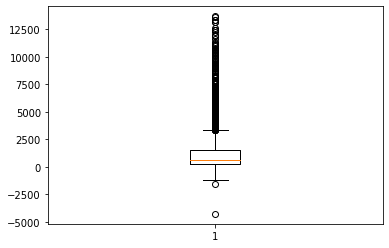

In [130]:
# outlier Treatment
plt.boxplot(grouped_df['Amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x14122566b08>,
 'caps': [<matplotlib.lines.Line2D at 0x14122566c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x14122566208>],
 'medians': [<matplotlib.lines.Line2D at 0x14122570a08>],
 'fliers': [<matplotlib.lines.Line2D at 0x14122570b08>],
 'means': []}

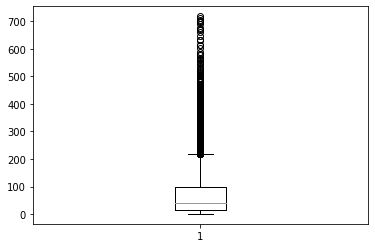

In [131]:
plt.boxplot(grouped_df['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x141225d3688>,
 'caps': [<matplotlib.lines.Line2D at 0x141225d3f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x141225cacc8>],
 'medians': [<matplotlib.lines.Line2D at 0x141225d6ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x141225dcd48>],
 'means': []}

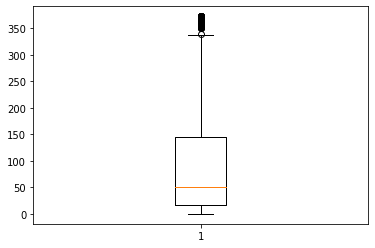

In [132]:
plt.boxplot(grouped_df['Last_Purchase'])

##### Two types of Outliers
    - Statistical - label some values as outlier depending upon statistics
    - domain specific - Label some values as outlier depending upon the domain we are working

In [114]:
# removing (statistical) outliers
# outlier treatment for amount
Q1 = grouped_df.Amount.quantile(0.05)
Q3 = grouped_df.Amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Amount >= Q1 - 1.5*IQR) & (grouped_df.Amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.Last_Purchase.quantile(0.05)
Q3 = grouped_df.Last_Purchase.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Last_Purchase >= Q1 - 1.5*IQR) & (grouped_df.Last_Purchase <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = grouped_df.Frequency.quantile(0.05)
Q3 = grouped_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Frequency >= Q1 - 1.5*IQR) & (grouped_df.Frequency <= Q3 + 1.5*IQR)]

In [115]:
#Rescaling

from sklearn.preprocessing import StandardScaler
#Mean 0 and SD will be 1 using Standard Scaler

In [116]:
rfm_df = grouped_df[['Amount','Frequency','Last_Purchase']]

#instantiate
scaler = StandardScaler()

#fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled

array([[-0.72373821, -0.75288754,  2.30161144],
       [ 1.73161722,  1.04246665, -0.90646561],
       [ 0.30012791, -0.46363604, -0.18365813],
       ...,
       [-0.67769602, -0.70301659,  0.86589794],
       [-0.6231313 , -0.64317145, -0.84705678],
       [ 0.32293822, -0.07464263, -0.50050524]])

In [117]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


##### Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [118]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [119]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(rfm_df_scaled)

0.9566841847804605

Since the Hopkins Statistics return 0.95, the data has a high tendency to cluster

### Step 4 : Modelling

In [120]:
from sklearn.cluster import KMeans

In [121]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [122]:
kmeans.labels_

array([0, 2, 1, ..., 0, 1, 1])

#### Finding the Optimal Number of cluster for the dataset

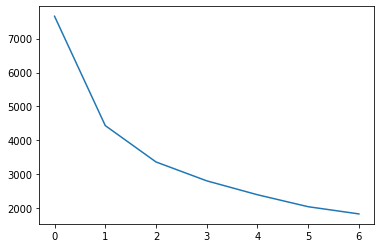

In [123]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

Here, 0 in x is 2, 1 in x is 3 and so on.
    From the graph, by addition of more clusters the curve decreases ( Sum of Squared Distance, SSD, decreases )
    From the graph, there should be 3 clusters



### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [124]:
from sklearn.metrics import silhouette_score

In [125]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.47782241003860476
For n_clusters=5, the silhouette score is 0.46481058150500315
For n_clusters=6, the silhouette score is 0.41766147997150216
For n_clusters=7, the silhouette score is 0.41768907282021733
For n_clusters=8, the silhouette score is 0.40776912256990355


In [133]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [134]:
kmeans.labels_

array([2, 0, 1, ..., 2, 1, 1])

In [135]:
grouped_df['ClusterID'] = kmeans.labels_
grouped_df.head()

,CustomerID,Amount,Frequency,Last_Purchase,ClusterID
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


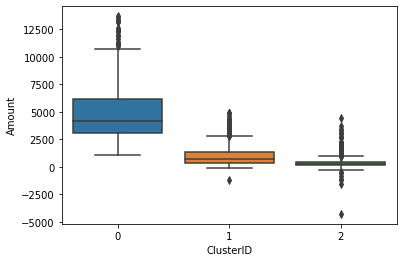

In [137]:
#PLOT Amount
sns.boxplot(x='ClusterID' , y='Amount' , data=grouped_df)

 - Cluster 0 : High Amount Customer
 - Cluster 1 : Medium Amount Customers
 - Cluster 2 : Low Amount Customers

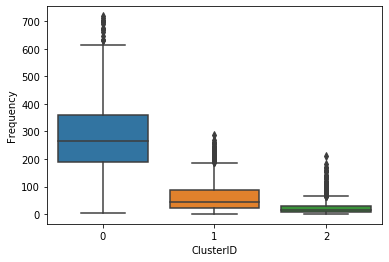

In [138]:
#PLOT Frequency
sns.boxplot(x='ClusterID' , y='Frequency' , data=grouped_df)

 - Cluster 0 : High Frequency Customer
 - Cluster 1 : Medium Frequency Customers
 - Cluster 2 : Low Frequency Customers

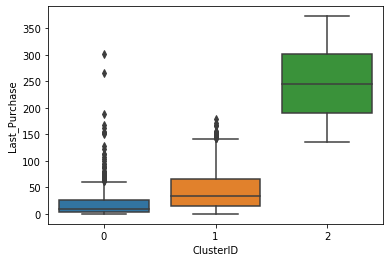

In [139]:
#PLOT Last_Purchase (Recency)
sns.boxplot(x='ClusterID' , y='Last_Purchase' , data=grouped_df)

 - Cluster 0 : Low Recency Customer
 - Cluster 1 : Medium Frequency Customers
 - Cluster 2 : High Recency Customers